## 2nd Data preprocessing and binary classification

  * In this task you have to handle features of various data types.
  * The features should be preprocessed and transformed to numeric representation, before training an ML model on the data.
  

## Data source

Your task is to predict the survival of Titanic passengers. Training data is in file **data.csv** and validation data in **evaluation.csv**.

### Features
* survived - 0 = No, 1 = Yes, **target variable**, 
* pclass - passenger's class, 1 = first, 2 = second, 3 = third
* name
* sex
* age - in years
* sibsp	- number of siblings / spouses onboard
* parch - number of parents / children onboard
* ticket - ticket number
* fare - ticket fare
* cabin	- cabin number
* embarked	- place of embarkment, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Home/destination

## Instructions

  * In the Jupyter notebook load **data.csv**. Split the data into subsets suitable for ML model training.
  * Explore and transform particular features into a format suitable for the selected classification method.
  * You can create new features (based on the existing ones), e.g. you can create a column with the length of the passenger's name. You can drop some features entirely too.
  * Handle the missing values in the dataset.
  * Select a suitable classification method from the lectures. Train it on the training set and tune the hyperparameters. Compute its accuracy on the training and validation set.
  * Load data from the file **evaluation.csv**. Compute predictions from these data (there are no target variable values in the file). Create a file **results.csv** and save your predictions into two columns - ID and the prediction of surviving. Upload this file alongside the Jupyter notebook to the repository.
  * Possible head of the file **results.csv**:
  
```
ID,survived
1000,0
1001,1
...
```
Select the best one based on the accuracy on the validation set. Use cross-validation to estimate the real accuracy of the best model. Use this model for prediction on the **evaluation.csv** data.
Try to use at least two advanced methods for filling missing values in the `age` feature. Explore the impact of these methods on the performance of the trained model. Use the method which you find to perform the best for the prediction on the **evaluation.csv** data.
  

In [22]:
import pandas as pd
import numpy as np
import math
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

### 1. Exploring data from data.csv file

In [23]:
data = pd.read_csv('data.csv')
data

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S,"England Oglesby, IL"
1,1,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S,NaN
2,2,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,NaN
3,3,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S,NaN
4,4,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S,NaN
996,996,1,3,"Finoli, Mr. Luigi",male,NaN,0,0,SOTON/O.Q. 3101308,7.0500,NaN,S,"Italy Philadelphia, PA"
997,997,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,"Stanton, IA"
998,998,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S,NaN


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        797 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       1000 non-null   float64
 10  cabin      226 non-null    object 
 11  embarked   998 non-null    object 
 12  home.dest  554 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [25]:
data.describe()

,ID,survived,pclass,age,sibsp,parch,fare
count,1000.000000,1000.000000,1000.000000,797.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.393000,2.312000,29.342535,0.503000,0.396000,33.340479
std,288.819436,0.488661,0.832676,14.408116,1.029102,0.861351,50.576026
min,0.000000,0.000000,1.000000,0.333300,0.000000,0.000000,0.000000
25%,249.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,499.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,749.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850
max,999.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [26]:
print(f'\nNumber of NaN values in the columns:')
data.isnull().sum(axis=0)


Number of NaN values in the columns:


ID             0
survived       0
pclass         0
name           0
sex            0
age          203
sibsp          0
parch          0
ticket         0
fare           0
cabin        774
embarked       2
home.dest    446
dtype: int64

###### Target variable is 'survived', it is binary classification, means survived (1) or not(0).To choose binary features for building tree we need to check relevant columns of data in relation to target variable 'survived', I choose to see the corellation between some columns (sex, pclass, fare, embarked, age) and 'survived' variable:

In [27]:
data.columns

Index(['ID', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'home.dest'],
      dtype='object')

In [28]:
data.groupby(['sex']).survived.sum() # more females are survived (twice of male)

sex
female    263
male      130
Name: survived, dtype: int64

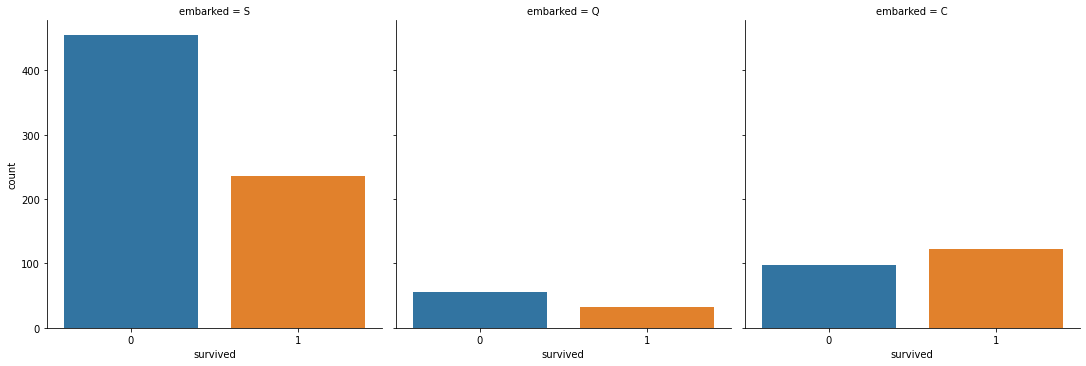

In [29]:
sb.catplot(x='survived', col='embarked', kind='count' , data=data) # as we can see, mostly survived embarked from  S, then from C

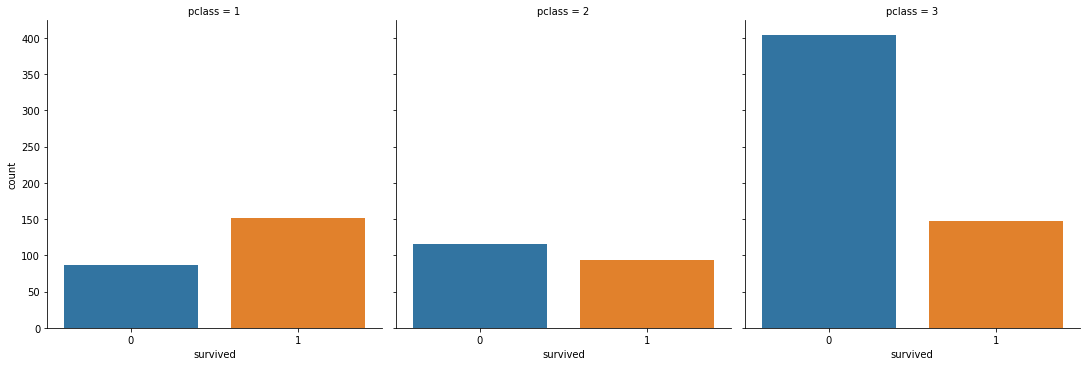

In [30]:
sb.catplot(x='survived', col='pclass', kind='count' , data=data) # from 1-st and 3-rd classes number of survived almost the same number of passengers

survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fare, dtype: object

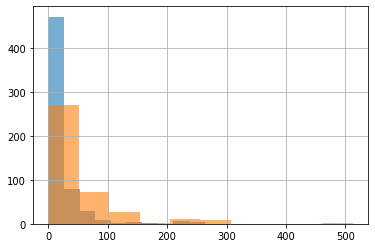

In [31]:
data.groupby('survived').fare.hist(alpha=0.6) # we can see that who paid more had bigger chance to survive

In [32]:
data.groupby('survived').fare.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,607.0,23.330203,34.576250,0.0,7.8542,10.5000,26.00,263.0000
1,393.0,48.801644,65.389778,0.0,11.2417,25.7417,57.75,512.3292


In [33]:
data.groupby('survived').age.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,461.0,29.930766,13.760053,0.3333,21.0,28.0,38.0,74.0
1,336.0,28.535466,15.236477,0.4167,19.0,27.0,38.0,80.0


In [34]:
data.groupby('survived').sibsp.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,607.0,0.533773,1.203034,0.0,0.0,0.0,1.0,8.0
1,393.0,0.455471,0.676634,0.0,0.0,0.0,1.0,4.0


In [35]:
data.groupby('survived').parch.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,607.0,0.336079,0.895017,0.0,0.0,0.0,0.0,9.0
1,393.0,0.488550,0.798913,0.0,0.0,0.0,1.0,5.0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        797 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       1000 non-null   float64
 10  cabin      226 non-null    object 
 11  embarked   998 non-null    object 
 12  home.dest  554 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


###### Filling the missing values: The number of passangers are 1000, but column 'age' only 797. I filled with margin of column 'age'. Also missing values in column 'embarked ' filled with Nan values, which later will be converted to numeric value (-1).  I skipped columns 'home_dest', 'cabin', because they are not relevant to our prediction and not using them.

In [86]:
data['age'] = data.age.fillna(data.age.median())
data['embarked'] = data.embarked.fillna('Nan')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   int16  
 4   age        1000 non-null   float64
 5   sibsp      1000 non-null   int64  
 6   parch      1000 non-null   int64  
 7   ticket     1000 non-null   int16  
 8   fare       1000 non-null   float64
 9   cabin      1000 non-null   int16  
 10  embarked   1000 non-null   int8   
 11  home.dest  1000 non-null   int16  
 12  sex_male   1000 non-null   uint8  
dtypes: float64(2), int16(4), int64(5), int8(1), uint8(1)
memory usage: 64.6 KB


###### Checking dtypes of variables and converting them to numeric:

In [38]:
data = pd.get_dummies(data, columns=['sex'], drop_first=True)
data

,ID,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,sex_male
0,0,1,3,"Dorking, Mr. Edward Arthur",19.0,0,0,A/5. 10482,8.0500,NaN,S,"England Oglesby, IL",1
1,1,1,2,"Smith, Miss. Marion Elsie",40.0,0,0,31418,13.0000,NaN,S,NaN,0
2,2,0,3,"Hegarty, Miss. Hanora ""Nora""",18.0,0,0,365226,6.7500,NaN,Q,NaN,0
3,3,0,3,"Sage, Mr. John George",27.0,1,9,CA. 2343,69.5500,NaN,S,NaN,1
4,4,0,3,"Cacic, Miss. Marija",30.0,0,0,315084,8.6625,NaN,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,3,"Sdycoff, Mr. Todor",27.0,0,0,349222,7.8958,NaN,S,NaN,1
996,996,1,3,"Finoli, Mr. Luigi",27.0,0,0,SOTON/O.Q. 3101308,7.0500,NaN,S,"Italy Philadelphia, PA",1
997,997,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",28.0,1,1,347080,14.4000,NaN,S,"Stanton, IA",0
998,998,0,3,"Sivic, Mr. Husein",40.0,0,0,349251,7.8958,NaN,S,NaN,1


###### Converting column 'sex' from categorical variable into numerical. By using function dummies, is  created  column sex_male and sex_female (but the second one is dropped), and set up value 1 to indicate it as male if it returns true, else (female) value =0 

In [39]:
data.dtypes
string_cols = data.select_dtypes(['object']).columns

print('\nThe following columns have string values:')
print(string_cols)
data[string_cols].nunique()


The following columns have string values:
Index(['name', 'ticket', 'cabin', 'embarked', 'home.dest'], dtype='object')


name         999
ticket       740
cabin        156
embarked       3
home.dest    308
dtype: int64

In [42]:
string_cols = data.select_dtypes(['object']).columns
data[string_cols] = data[string_cols].astype('category').apply(lambda x: x.cat.codes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   int16  
 4   age        1000 non-null   float64
 5   sibsp      1000 non-null   int64  
 6   parch      1000 non-null   int64  
 7   ticket     1000 non-null   int16  
 8   fare       1000 non-null   float64
 9   cabin      1000 non-null   int16  
 10  embarked   1000 non-null   int8   
 11  home.dest  1000 non-null   int16  
 12  sex_male   1000 non-null   uint8  
dtypes: float64(2), int16(4), int64(5), int8(1), uint8(1)
memory usage: 64.6 KB


In [43]:
data

,ID,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,sex_male
0,0,1,3,253,19.0,0,0,590,8.0500,-1,2,93,1
1,1,1,2,845,40.0,0,0,291,13.0000,-1,2,-1,0
2,2,0,3,390,18.0,0,0,499,6.7500,-1,1,-1,0
3,3,0,3,800,27.0,1,9,624,69.5500,-1,2,-1,1
4,4,0,3,135,30.0,0,0,295,8.6625,-1,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,3,811,27.0,0,0,422,7.8958,-1,2,-1,1
996,996,1,3,283,27.0,0,0,700,7.0500,-1,2,140,1
997,997,0,3,223,28.0,1,1,383,14.4000,-1,2,258,0
998,998,0,3,829,40.0,0,0,443,7.8958,-1,2,-1,1


### 2. Building own dataFrame with only relevant data (features) for building Decision Tree

In [44]:
customized_data = data[['fare', 'age' , 'pclass','survived', 'sibsp', 'sex_male', 'embarked' ]]
customized_data

,fare,age,pclass,survived,sibsp,sex_male,embarked
0,8.0500,19.0,3,1,0,1,2
1,13.0000,40.0,2,1,0,0,2
2,6.7500,18.0,3,0,0,0,1
3,69.5500,27.0,3,0,1,1,2
4,8.6625,30.0,3,0,0,0,2
...,...,...,...,...,...,...,...
995,7.8958,27.0,3,0,0,1,2
996,7.0500,27.0,3,1,0,1,2
997,14.4000,28.0,3,0,1,0,2
998,7.8958,40.0,3,0,0,1,2


In [45]:
#dtypes of all variables are numeric
customized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fare      1000 non-null   float64
 1   age       1000 non-null   float64
 2   pclass    1000 non-null   int64  
 3   survived  1000 non-null   int64  
 4   sibsp     1000 non-null   int64  
 5   sex_male  1000 non-null   uint8  
 6   embarked  1000 non-null   int8   
dtypes: float64(2), int64(3), int8(1), uint8(1)
memory usage: 41.1 KB


In [46]:
# split the dataset into feature matrix and target vector (column survived) and #converting the dataframes to arrays:
Xdata = customized_data.drop(columns='survived') #dropping target variable from  feature matrix
ydata = customized_data.survived# taget vector 'survived'
Xdata, ydata

(        fare   age  pclass  sibsp  sex_male  embarked
 0     8.0500  19.0       3      0         1         2
 1    13.0000  40.0       2      0         0         2
 2     6.7500  18.0       3      0         0         1
 3    69.5500  27.0       3      1         1         2
 4     8.6625  30.0       3      0         0         2
 ..       ...   ...     ...    ...       ...       ...
 995   7.8958  27.0       3      0         1         2
 996   7.0500  27.0       3      0         1         2
 997  14.4000  28.0       3      1         0         2
 998   7.8958  40.0       3      0         1         2
 999   7.8542  27.0       3      0         1         2
 
 [1000 rows x 6 columns],
 0      1
 1      1
 2      0
 3      0
 4      0
       ..
 995    0
 996    1
 997    0
 998    0
 999    0
 Name: survived, Length: 1000, dtype: int64)

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(Xdata, ydata)

DecisionTreeClassifier()

###### Splitting data into training (80%) test (20%) sets:

In [50]:
rd_seed = 350
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.25, random_state=rd_seed)

In [51]:
print('original_data:') 
display(Xdata.shape)
display(ydata.shape)
print('train data:')
display(Xtrain.shape)
display(ytrain.shape)
print('test data')
display(Xtest.shape)
display(ytest.shape)

original_data:


(1000, 6)

(1000,)

train data:


(750, 6)

(750,)

test data


(250, 6)

(250,)

In [52]:
#splitting train data into two pieces: train_data (75%) and  25% valuat.data
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=rd_seed) 
print('new train data')
display(Xtrain.shape)
display(ytrain.shape)
print('validation data')
display(Xval.shape)
display(yval.shape)

new train data


(562, 6)

(562,)

validation data


(188, 6)

(188,)

In [53]:
dt = DecisionTreeClassifier(max_depth=70, min_samples_leaf=1)
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=70)

In [54]:
ypredicted= dt.predict(Xtrain)

In [55]:
(ytrain - ypredicted).value_counts(normalize=True)

 0    0.982206
 1    0.014235
-1    0.003559
Name: survived, dtype: float64

In [56]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))

accuracy score (train): 0.982206


In [57]:
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))

accuracy score (test): 0.744000



###### As shwon above the difference between accuracy of train  and test prediction is large.

## 2A. Hyperparameter tuning - max_depth a criterion:

In [58]:
#max_depth:
val_acc = []
train_acc = []
depths = range(1,51)
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))

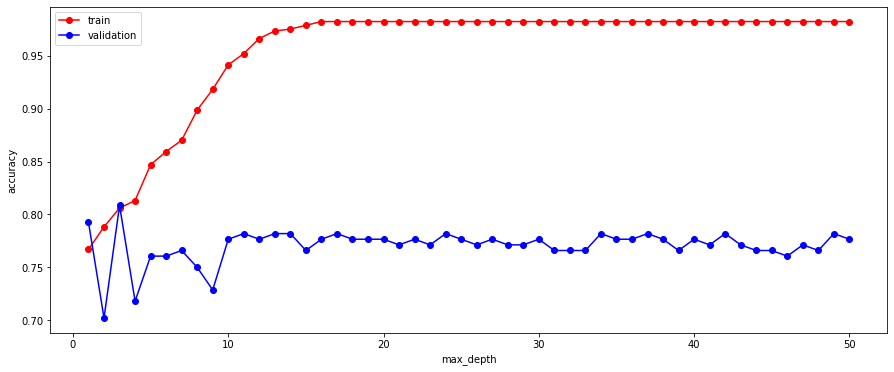

In [59]:
%matplotlib inline
plt.figure(figsize=(15,6))
plt.plot(depths, train_acc,'or-') #o: points, r: color, -: linking points with a line
plt.plot(depths, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [60]:
#calculating optimal depth
optimal_depth = np.argmax(val_acc)
print(f'optimal_depth: {optimal_depth}\naccuracy score (validation): {val_acc[optimal_depth - 1]:.6f}')

optimal_depth: 2
accuracy score (validation): 0.702128


In [61]:
#re-calculating by using optimal depth:
dt = DecisionTreeClassifier(max_depth=optimal_depth)
dt.fit(Xtrain, ytrain)
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))

accuracy score (test): 0.812000
accuracy score (train): 0.788256


#### Calculating two main criterian(entropy and gini) for max_depth in range [1,30]:

In [62]:
param_grid = {
    'max_depth': range(1,31), 
    'criterion': ['entropy', 'gini']
}
param_comb = ParameterGrid(param_grid)

[param_comb[i] for i in range(14, 32)]

[{'max_depth': 15, 'criterion': 'entropy'},
 {'max_depth': 16, 'criterion': 'entropy'},
 {'max_depth': 17, 'criterion': 'entropy'},
 {'max_depth': 18, 'criterion': 'entropy'},
 {'max_depth': 19, 'criterion': 'entropy'},
 {'max_depth': 20, 'criterion': 'entropy'},
 {'max_depth': 21, 'criterion': 'entropy'},
 {'max_depth': 22, 'criterion': 'entropy'},
 {'max_depth': 23, 'criterion': 'entropy'},
 {'max_depth': 24, 'criterion': 'entropy'},
 {'max_depth': 25, 'criterion': 'entropy'},
 {'max_depth': 26, 'criterion': 'entropy'},
 {'max_depth': 27, 'criterion': 'entropy'},
 {'max_depth': 28, 'criterion': 'entropy'},
 {'max_depth': 29, 'criterion': 'entropy'},
 {'max_depth': 30, 'criterion': 'entropy'},
 {'max_depth': 1, 'criterion': 'gini'},
 {'max_depth': 2, 'criterion': 'gini'}]

In [63]:
val_acc = []
train_acc = []
for params in param_comb:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'])
    dt.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))

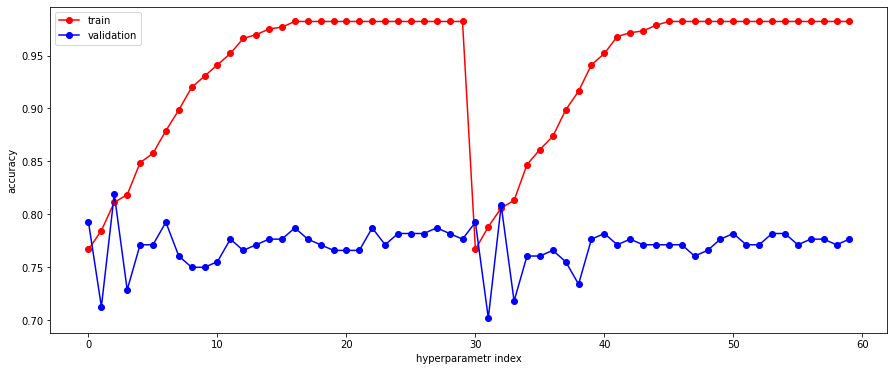

In [64]:
plt.figure(figsize=(15,6))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [65]:
best_params = param_comb[np.argmax(val_acc)]
print(best_params)
print(val_acc[np.argmax(val_acc)])
print(train_acc[np.argmax(val_acc)])

{'max_depth': 3, 'criterion': 'entropy'}
0.8191489361702128
0.8113879003558719


In [66]:
dt = DecisionTreeClassifier(**best_params) 
dt.fit(Xtrain, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, dt.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))

accuracy score (train): 0.811388
accuracy score (validation): 0.819149
accuracy score (test): 0.800000


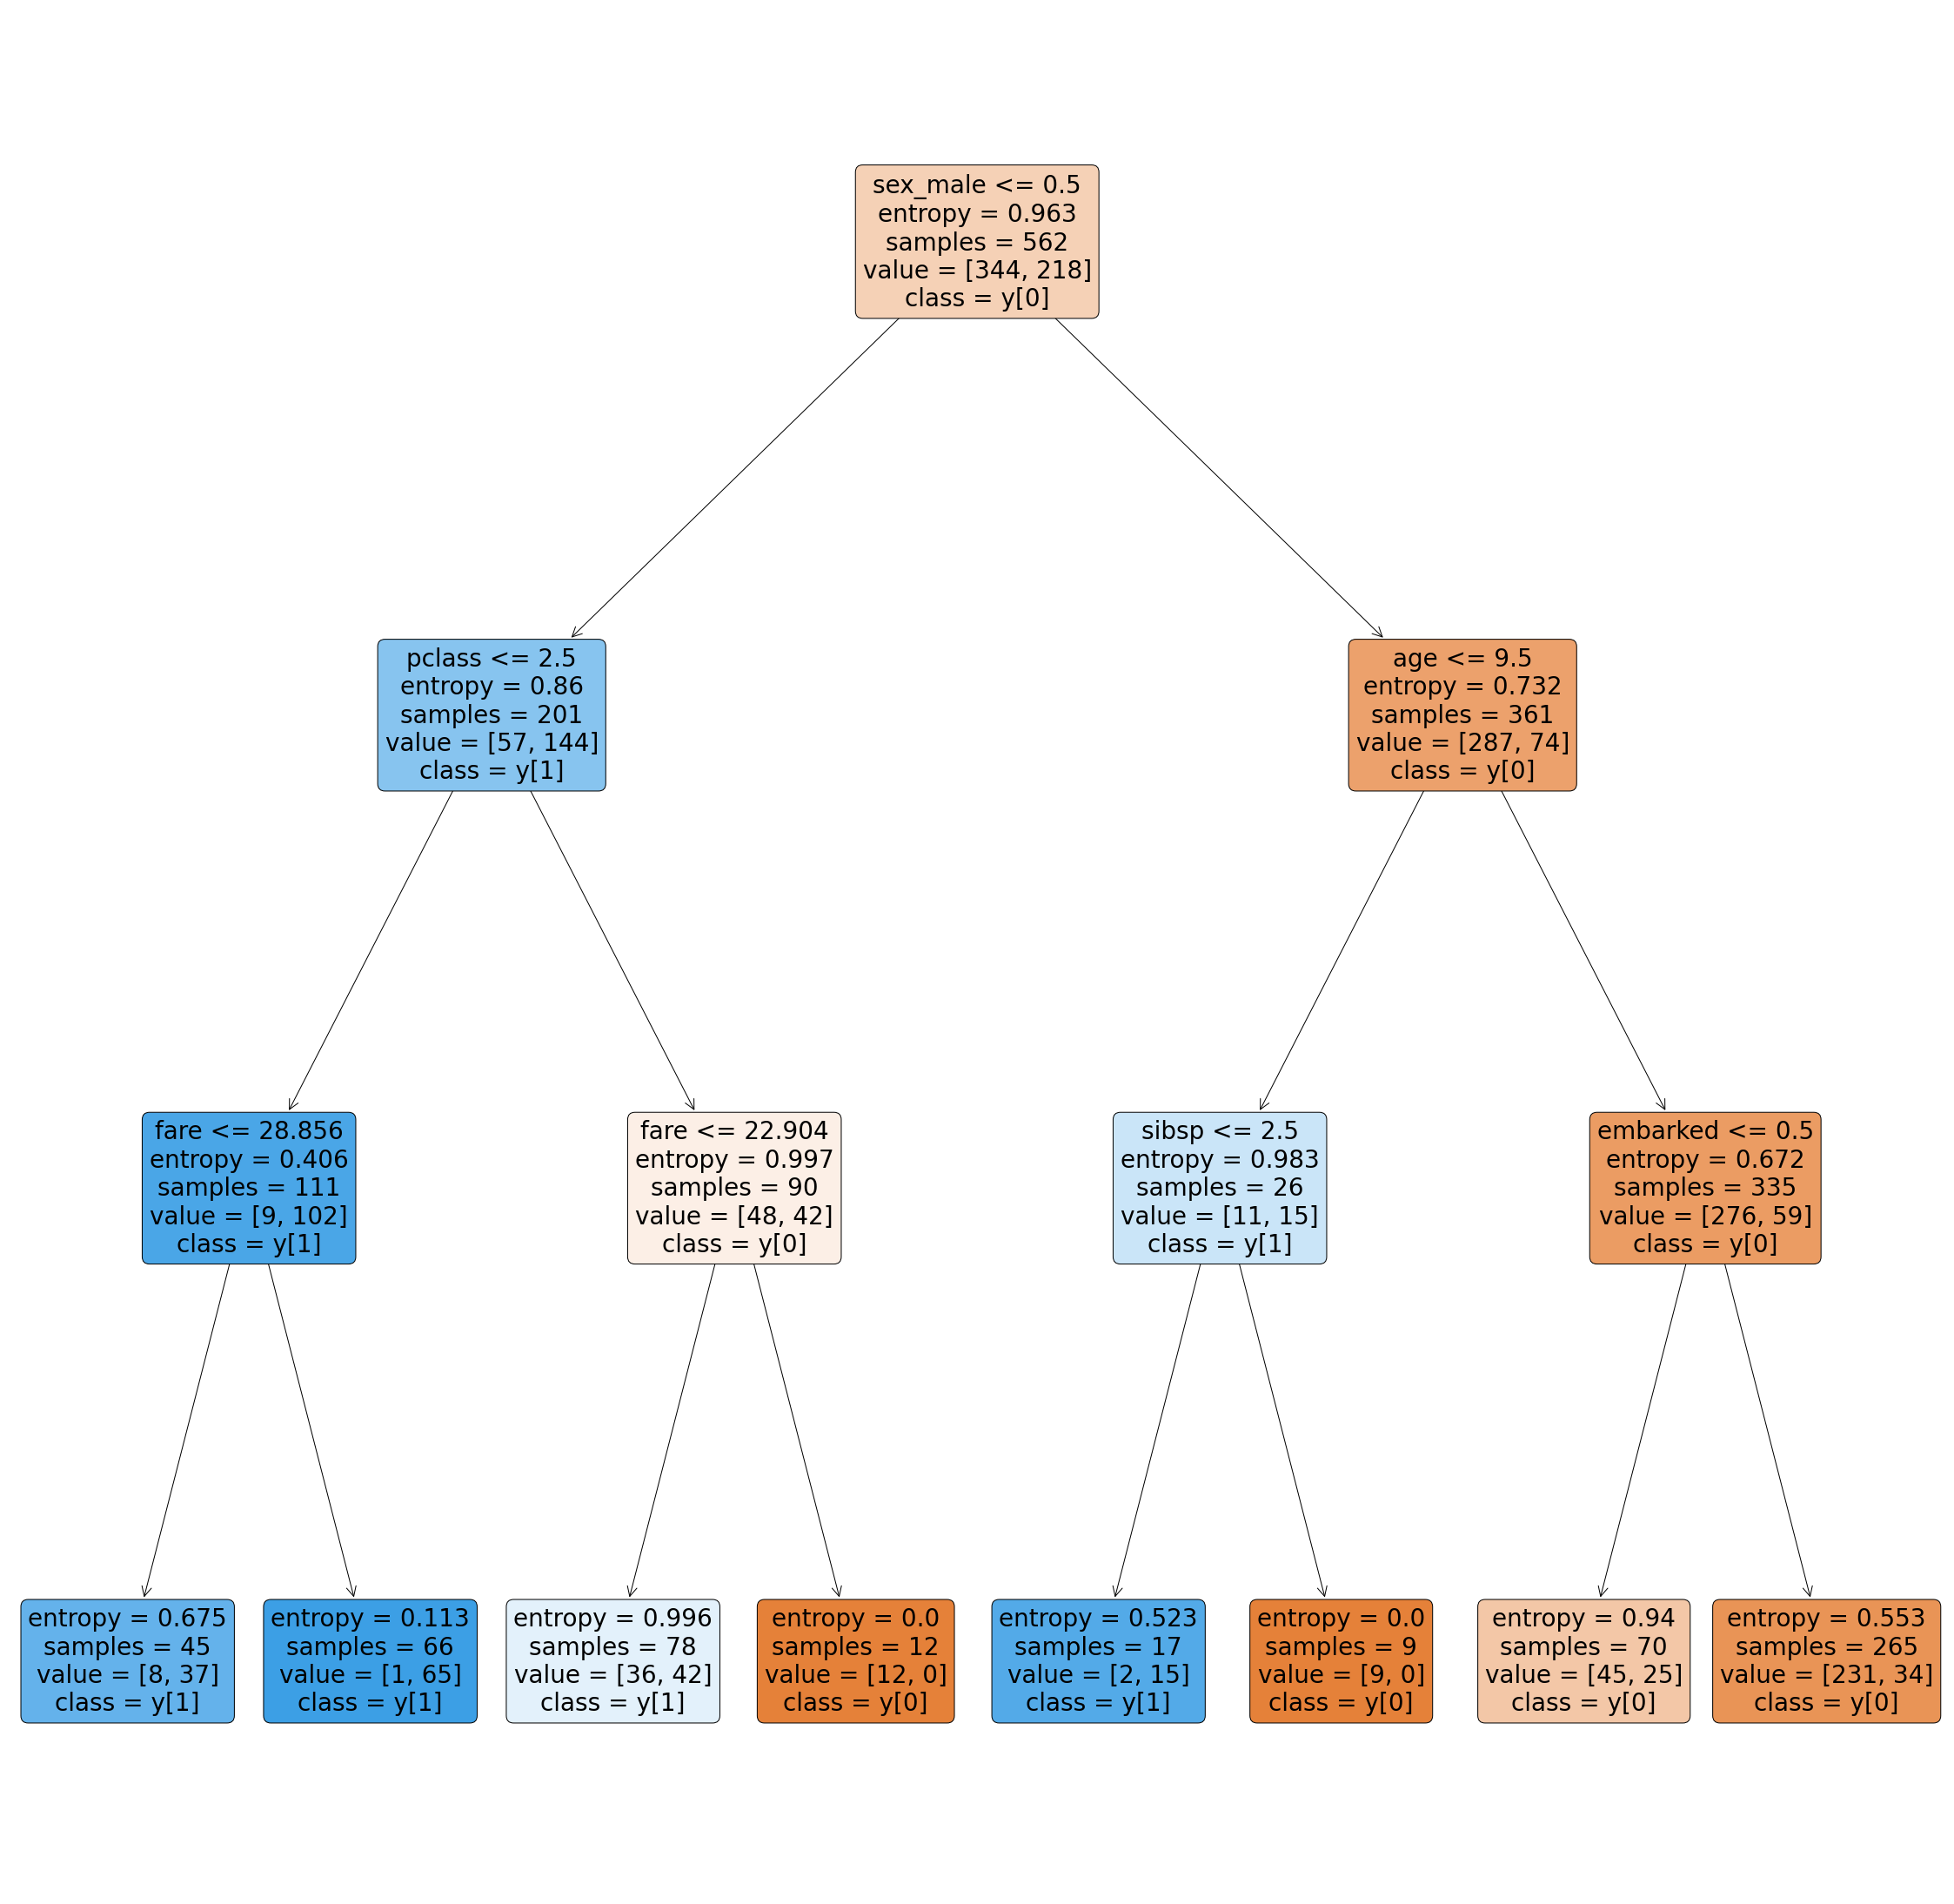

In [67]:
plt.figure(figsize=(40,40))
plot_tree(dt, filled=True, feature_names=Xdata.columns, class_names=True, rounded=True) ;

## 3. By using the result  on evalution data to predict  survivers:

In [68]:
evaluation = pd.read_csv("evaluation.csv")
evaluation

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S,London
1,1001,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S,London
2,1002,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S,"Cornwall / Clear Creek, CO"
3,1003,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.1000,NaN,S,NaN
4,1004,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",female,60.0,1,0,24065,26.0000,NaN,S,"Swindon, England"
...,...,...,...,...,...,...,...,...,...,...,...,...
304,1304,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,NaN,Q,"Co Cork, Ireland Roxbury, MA"
305,1305,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,"Hong Kong New York, NY"
306,1306,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,NaN,C,NaN
307,1307,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,"Youngstown, OH"


In [69]:
evaluation.columns

Index(['ID', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest'],
      dtype='object')

In [70]:
evaluation = pd.get_dummies(evaluation, columns=['sex'], drop_first=True)
data

,ID,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,sex_male
0,0,1,3,253,19.0,0,0,590,8.0500,-1,2,93,1
1,1,1,2,845,40.0,0,0,291,13.0000,-1,2,-1,0
2,2,0,3,390,18.0,0,0,499,6.7500,-1,1,-1,0
3,3,0,3,800,27.0,1,9,624,69.5500,-1,2,-1,1
4,4,0,3,135,30.0,0,0,295,8.6625,-1,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,3,811,27.0,0,0,422,7.8958,-1,2,-1,1
996,996,1,3,283,27.0,0,0,700,7.0500,-1,2,140,1
997,997,0,3,223,28.0,1,1,383,14.4000,-1,2,258,0
998,998,0,3,829,40.0,0,0,443,7.8958,-1,2,-1,1


In [71]:
evaluation.columns

Index(['ID', 'pclass', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'home.dest', 'sex_male'],
      dtype='object')

In [72]:
evaluation_data = evaluation[['pclass', 'sex_male', 'age','fare' , 'sibsp', 'embarked' ]]
evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    309 non-null    int64  
 1   sex_male  309 non-null    uint8  
 2   age       249 non-null    float64
 3   fare      308 non-null    float64
 4   sibsp     309 non-null    int64  
 5   embarked  309 non-null    object 
dtypes: float64(2), int64(2), object(1), uint8(1)
memory usage: 12.5+ KB


In [73]:
evaluation_data

,pclass,sex_male,age,fare,sibsp,embarked
0,2,0,24.0,27.0000,2,S
1,2,0,25.0,30.0000,1,S
2,2,1,38.0,21.0000,1,S
3,3,0,19.0,16.1000,1,S
4,2,0,60.0,26.0000,1,S
...,...,...,...,...,...,...
304,3,0,18.5,7.2833,0,Q
305,3,1,32.0,56.4958,0,S
306,3,1,22.5,7.2250,0,C
307,1,0,45.0,164.8667,1,S


In [80]:
evaluation_data.loc[:, 'age'] = evaluation_data.age.fillna(evaluation_data.age.median())
evaluation_data.loc[:, 'fare'] = evaluation_data.fare.fillna(evaluation_data.fare.median())
evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    309 non-null    int64  
 1   sex_male  309 non-null    uint8  
 2   age       309 non-null    float64
 3   fare      309 non-null    float64
 4   sibsp     309 non-null    int64  
 5   embarked  309 non-null    int8   
dtypes: float64(2), int64(2), int8(1), uint8(1)
memory usage: 10.4 KB


In [75]:
evaluation_data.dtypes
string_cols = evaluation_data.select_dtypes(['object']).columns

print('\nThe following columns have string values:')
print(string_cols)
evaluation_data[string_cols].nunique()


The following columns have string values:
Index(['embarked'], dtype='object')


embarked    3
dtype: int64

In [82]:
evaluation_data[string_cols] = evaluation_data[string_cols].astype('category').apply(lambda x: x.cat.codes)
evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    309 non-null    int64  
 1   sex_male  309 non-null    uint8  
 2   age       309 non-null    float64
 3   fare      309 non-null    float64
 4   sibsp     309 non-null    int64  
 5   embarked  309 non-null    int8   
dtypes: float64(2), int64(2), int8(1), uint8(1)
memory usage: 10.4 KB


/home/nuray/.local/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [83]:
Y_pred = dt.predict(evaluation_data)
evaluation['Survived'] = Y_pred
evaluation[['ID', 'Survived']].to_csv('results.csv', index=False)

In [84]:
res = pd.read_csv("results.csv")
res

,ID,Survived
0,1000,0
1,1001,0
2,1002,0
3,1003,0
4,1004,0
...,...,...
304,1304,1
305,1305,1
306,1306,1
307,1307,0
